In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, model_selection

In [2]:
iris = datasets.load_iris()   # Load Iris dataset
X = iris.data[:, :2]          # Store the first 2 features    
Y = iris.target               # Store the labels

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets with a ratio of 0.7/0.3:
X_train, X_val_test, Y_train, Y_val_test = model_selection.train_test_split(X, Y,      
                                                                            test_size=0.3, 
                                                                            shuffle=True, 
                                                                            random_state=seed)
seed = 221
# Shuffle and split the data into validation and test sets with a ratio of 0.5/0.5:
X_val, X_test, Y_val, Y_test = model_selection.train_test_split(X_val_test, Y_val_test,      #TODO!
                                                                            test_size=0.5, #TODO! 
                                                                            shuffle=True, 
                                                                            random_state=seed)

# Store number of datapoints in each dataset:
N_train = len(Y_train)
N_val =  len(Y_val)
N_test = len(Y_test)
print("Datapoints used for training:   ", N_train)
print("Datapoints used for validation: ", N_val)
print("Datapoints used for testing :   ", N_test)

Datapoints used for training:    105
Datapoints used for validation:  22
Datapoints used for testing :    23


In [3]:
### Plot parameters:
# Light colors for decision boundaries plots:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['red', 'darkcyan', 'darkblue'])

In [4]:
def plot_iris(
    X_train,
    Y_train,
    X_val_test,
    Y_val_test,
):
    """
    Scatter plots of training and testing iris datapoints

    Colors represent specific iris species 
    Validation or test points appear in light colors
    Training points appear in bold colors
    """
    # Matplotlib method to get current axis
    ax = plt.gca()    
    # Scatter plot validation or testing points using light colors
    ax.scatter(
        X_val_test[:,0], X_val_test[:, 1], c=Y_val_test,  #TODO!
        cmap=cmap_light, edgecolor='k', s=20, zorder=2
    )
    # Overlay the training points in bold colors:
    ax.scatter(
        X_train[:,0], X_train[:, 1], c=Y_train,  #TODO!
        cmap=cmap_bold, edgecolor='k', s=20, zorder=2
    )
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    return ax

def draw_knn_boundaries(
    knn, 
    h=0.02,  # Step size in the mesh
):
    """
    Draw boundaries as decided by the trained knn
    """
    ax = plt.gca()
    [xmin, xmax] = ax.get_xlim()
    [ymin, ymax] = ax.get_ylim()
    # Generate the axis associated to the first feature: 
    x_axis = np.arange(xmin, xmax, h)
    # Generate the axis associated to the 2nd feature: 
    y_axis = np.arange(ymin, ymax, h)
    # Generate a meshgrid (2D grid) from the 2 axis:
    x_grid, y_grid = np.meshgrid(x_axis, y_axis)
    # Vectorize the grids into column vectors:
    x_grid_vectorized = x_grid.flatten()
    x_grid_vectorized = np.expand_dims(x_grid_vectorized, axis=1)
    y_grid_vectorized = y_grid.flatten()
    y_grid_vectorized = np.expand_dims(y_grid_vectorized, axis=1)
    # Concatenate the vectorized grids
    grid = np.concatenate((x_grid_vectorized, y_grid_vectorized),
                                  axis=1)
    # Now you can use 'grid' as data to classify by the knn 

    # Predict concatenated features to get the decision boundaries:
    decision_boundaries = knn.predict(grid)

    # Reshape the decision boundaries into a 2D matrix:
    decision_boundaries = decision_boundaries.reshape(x_grid.shape)
    plt.pcolormesh(x_grid, y_grid, decision_boundaries, cmap=cmap_light, zorder=1, shading='auto')
    return ax

# Main work here:
def knn_on_iris(
    k,
    X_train,
    Y_train,
    X_val,
    Y_val,
):
    """
    Train a knn and plot its boundaries on iris data
    """

    # --------------------
    # Plot iris data
    # --------------------
    plot_iris(X_train, Y_train, X_val, Y_val) #TODO!

    # --------------------
    # Train the knn
    # --------------------

    # Create an instance of the KNeighborsClassifier class for current value of k:
    k_NN = neighbors.KNeighborsClassifier(n_neighbors=k)
    # Train the classifier with the training data
    k_NN.fit(X_train,Y_train)

    # --------------------
    # Draw knn boundaries
    # --------------------
    draw_knn_boundaries(k_NN) 
    plt.title("k-NN classification on Iris, k = " + str(k_NN.get_params().get("n_neighbors")))
    plt.show()

    # --------------------
    # Model accuracy:
    # --------------------

    # Accuracy on train set:
    train_predictions = k_NN.predict(X_train) 
    good_train_predictions = (train_predictions == Y_train)
    train_accuracy = np.sum(good_train_predictions) / len(X_train)
    # Accuracy on test set:
    val_predictions = k_NN.predict(X_val)
    good_val_predictions = (val_predictions == Y_val) 
    val_accuracy = np.sum(good_val_predictions) / len(X_val) 
    
    return (k_NN, train_accuracy, val_accuracy)


K-nn trained with k =  1
Train accuracy:  0.9333333333333333  -----  Validation accuracy:  0.7272727272727273
K-nn trained with k =  5
Train accuracy:  0.8571428571428571  -----  Validation accuracy:  0.7272727272727273
K-nn trained with k =  10
Train accuracy:  0.8  -----  Validation accuracy:  0.7272727272727273
K-nn trained with k =  20
Train accuracy:  0.7714285714285715  -----  Validation accuracy:  0.8636363636363636
K-nn trained with k =  30
Train accuracy:  0.780952380952381  -----  Validation accuracy:  0.8636363636363636
K-nn trained with k =  60
Train accuracy:  0.7619047619047619  -----  Validation accuracy:  0.8181818181818182


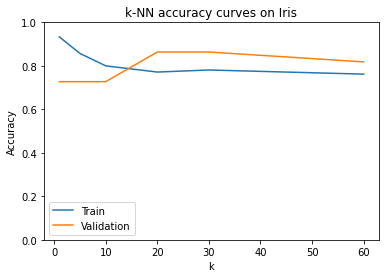

In [5]:
### k-NN on the Iris dataset for different values of k:
# Create vectors to store the results for each k:
train_accuracies = []
val_accuracies = []

# Train a knn for each value of k in k_list
k_list = [1, 5, 10, 20, 30, 60]
for k in k_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train) 
    
    pred = knn.predict(X_train)
    good_train_predictions = (pred == Y_train)
    train_acc = np.sum(good_train_predictions) / len(X_train)
    
    pred = knn.predict(X_val)
    good_val_predictions = (pred == Y_val)
    val_acc = np.sum(good_val_predictions) / len(X_val)
    
    print("K-nn trained with k = ", k)
    print("Train accuracy: ", train_acc, " ----- ", "Validation accuracy: ", val_acc)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plot accuracy curves:
plt.plot(k_list, train_accuracies)
plt.plot(k_list, val_accuracies)
plt.ylim(0, 1)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.title("k-NN accuracy curves on Iris")

# Display plots:
plt.show()

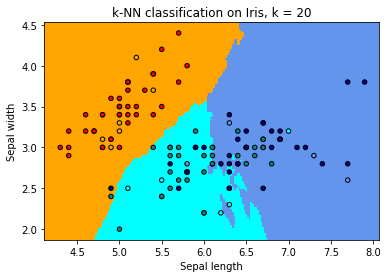

K-nn selected with k =  20
Train accuracy:  0.7714285714285715  -----  Validation accuracy:  0.8636363636363636
Test accuracy:  0.8260869565217391


In [6]:
# Based on the above plot I would choose k = 20 because the validation accuracy is highest 
k_selected = 20 
(knn, train_acc, val_acc) = knn_on_iris(k_selected, X_train, Y_train, X_val, Y_val) 
test_predictions = knn.predict(X_test)
good_test_predictions = (test_predictions == Y_test)
test_acc = np.sum(good_test_predictions) / len(X_test) 
print("K-nn selected with k = ", k_selected)
print("Train accuracy: ", train_acc, " ----- ", "Validation accuracy: ", val_acc)
print("Test accuracy: ", test_acc)

In [ ]:
# 3b: The validation accuracy goes down after k=30, so it seems to be overfitting for k > 30 - though the decline is pretty slow.

# 3c: Train accuracy for k = 1 is not 100% because there are samples in the data where the width/height of the sepal is the same, but not the label (thus two different species with the same sepal values). 

